# **Pré-processamento - Limpeza**

## **Definindo as features**

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [283]:
df = pd.read_csv('dataset_ies.csv')

In [284]:
df.head(3)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE


In [285]:
df.shape

(902676, 18)

In [286]:
df.columns

Index(['CODIGO_IES', 'NOME_IES', 'CATEGORIA_ADMINISTRATIVA',
       'ORGANIZACAO_ACADEMICA', 'CODIGO_CURSO', 'NOME_CURSO', 'GRAU',
       'AREA_OCDE', 'MODALIDADE', 'SITUACAO_CURSO', 'QT_VAGAS_AUTORIZADAS',
       'CARGA_HORARIA', 'CODIGO_AREA_OCDE_CINE', 'AREA_OCDE_CINE',
       'CODIGO_MUNICIPIO', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [287]:
df.nunique()

CODIGO_IES                   3706
NOME_IES                     3672
CATEGORIA_ADMINISTRATIVA        6
ORGANIZACAO_ACADEMICA           6
CODIGO_CURSO                86239
NOME_CURSO                   2206
GRAU                            5
AREA_OCDE                     408
MODALIDADE                      2
SITUACAO_CURSO                  3
QT_VAGAS_AUTORIZADAS          857
CARGA_HORARIA                3435
CODIGO_AREA_OCDE_CINE         423
AREA_OCDE_CINE                519
CODIGO_MUNICIPIO             3439
MUNICIPIO                    3325
UF                             28
REGIAO                          6
dtype: int64

Percebi que a coluna CODIGO_IES variava o código mesmo sendo para o mesmo curso. Por isso não fazer uso dele.

Percebe-se uma diferença entre o CODIGO_IES e CODIGO_MUNICIPIO, e NOME_IES e MUNICIPIO. Indicando possíveis erros no preenchimento do dataset.

In [288]:
df['AREA_OCDE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física', nan,
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química',
       'Administração hospitalar', 'Biomedicina',
       'Extração de petróleo e gás', 'Secretariado', 'Teologia',
       'Gestão de Turismo', 'Saúde (programas ou cursos gerais)',
       'Uso da internet', 'Forma

In [289]:
df['AREA_OCDE_CINE'].unique()

array(['Agronomia',
       'Formação de professor de língua/literatura vernácula (português)',
       'Formação de professor de geografia', 'Educação física',
       'Serviços penais', 'Gestão comercial',
       'Análise e Desenvolvimento de Sistemas (Tecnólogo)',
       'Gestão da informação', 'Formação de professor de dança',
       'Agrocomputação', 'Ciências contábeis', 'Administração',
       'Formação de professor de artes visuais',
       'Saúde e segurança no trabalho', 'Jogos digitais',
       'Serviços jurídicos e cartoriais',
       'Formação de professor de língua/literatura estrangeira moderna',
       'Formação de professor de língua/literatura vernácula e língua estrangeira moderna',
       'Gestão de negócios', 'Engenharia de produção',
       'Formação de professor de educação especial',
       'Sistemas de informação', 'Negócios internacionais',
       'Produção industrial', 'Engenharia química', 'Logística',
       'Administração hospitalar', 'Design gráfico', 'Biome

A coluna AREA_OCDE e AREA_OCDE_CINE consistia em várias variáveis muito diversas e que não representava com abrangência área no sentido geral, e sim em sentido mais específico. Exemplo: ao invés da área ser educação, eles colocam Pedagogia, assim como, Educação Física ao invés de ser da área saúde, é a própria educação física. Então para fins de avaliação não quer dizer muita coisa.

In [290]:
df = df.drop(columns=['CODIGO_IES',
                      'CODIGO_CURSO',
                      'AREA_OCDE',
                      'CODIGO_AREA_OCDE_CINE',
                      'AREA_OCDE_CINE',
                      'CODIGO_MUNICIPIO'])

In [291]:
df.columns

Index(['NOME_IES', 'CATEGORIA_ADMINISTRATIVA', 'ORGANIZACAO_ACADEMICA',
       'NOME_CURSO', 'GRAU', 'MODALIDADE', 'SITUACAO_CURSO',
       'QT_VAGAS_AUTORIZADAS', 'CARGA_HORARIA', 'MUNICIPIO', 'UF', 'REGIAO'],
      dtype='object')

In [292]:
df.head(3)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
0,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,ENGENHARIA AGRONÔMICA,Bacharelado,Educação a Distância,Em atividade,1000,4400,Presidente Prudente,SP,SUDESTE
1,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,LETRAS,Licenciatura,Educação a Distância,Em atividade,3000,3992,Sousa,PB,NORDESTE
2,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,GEOGRAFIA,Licenciatura,Educação a Distância,Em atividade,7620,3500,Aracaju,SE,NORDESTE


## **Exploração do dataframe**

In [293]:
df.shape

(902676, 12)

In [294]:
df['CATEGORIA_ADMINISTRATIVA'].unique()

array(['Privada com fins lucrativos', 'Privada sem fins lucrativos',
       'Pública Municipal', 'Pública Federal', 'Pública Estadual',
       'Especial'], dtype=object)

In [295]:
df['ORGANIZACAO_ACADEMICA'].unique()

array(['Centro Universitário', 'Universidade', 'Faculdade',
       'Instituto Federal de Educação, Ciência e Tecnologia',
       'Centro Federal de Educação Tecnológica',
       'Instituição Especialmente Credenciada para oferta de cursos lato sensu'],
      dtype=object)

In [296]:
df['GRAU'].unique()

array(['Bacharelado', 'Licenciatura', 'Tecnológico',
       'Área Básica de Ingresso (ABI)', 'Sequencial'], dtype=object)

In [297]:
df['MODALIDADE'].unique()

array(['Educação a Distância', 'Educação Presencial'], dtype=object)

In [298]:
df['SITUACAO_CURSO'].unique()

array(['Em atividade', 'Em extinção', 'Extinto'], dtype=object)

In [299]:
df['UF'].unique()

array(['SP', 'PB', 'SE', 'PR', 'PE', 'RN', 'SC', 'RJ', 'RS', 'GO', 'BA',
       'MG', 'MT', 'CE', 'PA', 'RO', 'TO', 'AM', 'ES', 'AC', 'MA', 'AL',
       'DF', 'ZZ', 'MS', 'PI', 'RR', 'AP'], dtype=object)

In [300]:
df[df['UF']=='ZZ'].head()

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
182,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,PROCESSOS QUÍMICOS,Tecnológico,Educação a Distância,Em atividade,1000,2488,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
528,FATEC - FACULDADE DE TEOLOGIA E CIÊNCIAS DE VO...,Privada sem fins lucrativos,Faculdade,PEDAGOGIA,Licenciatura,Educação a Distância,Em atividade,300,3366,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
1585,UNIVERSIDADE CESUMAR,Privada com fins lucrativos,Universidade,HISTÓRIA,Licenciatura,Educação a Distância,Em atividade,10000,3280,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
2113,Claretiano - Centro Universitário,Privada sem fins lucrativos,Centro Universitário,SECRETARIADO,Tecnológico,Educação a Distância,Em atividade,382,1600,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR
2166,CENTRO UNIVERSITÁRIO FAEL,Privada com fins lucrativos,Centro Universitário,GEOGRAFIA,Licenciatura,Educação a Distância,Em atividade,6000,3400,Ignorado ou exterior,ZZ,IGNORADO/EXTERIOR


In [301]:
df[df['UF']=='ZZ'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  191
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         80
CARGA_HORARIA               170
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Existem 191 cursos na categoria ZZ.

In [302]:
df['REGIAO'].unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE', 'NORTE',
       'IGNORADO/EXTERIOR'], dtype=object)

In [303]:
df[df['REGIAO']=='IGNORADO/EXTERIOR'].nunique()

NOME_IES                     25
CATEGORIA_ADMINISTRATIVA      2
ORGANIZACAO_ACADEMICA         3
NOME_CURSO                  191
GRAU                          3
MODALIDADE                    1
SITUACAO_CURSO                3
QT_VAGAS_AUTORIZADAS         80
CARGA_HORARIA               170
MUNICIPIO                     1
UF                            1
REGIAO                        1
dtype: int64

Dado que a categoria da UF ZZ e a categoria REGIAO IGNORADO/EXTERIOR tem a mesma quantidade (191), então ambos correspondem ao mesmo perfil.

In [304]:
df[df['NOME_CURSO'] == 'PSICOPEDAGOGIA']['GRAU'].value_counts()

GRAU
Bacharelado     4568
Licenciatura    1659
Name: count, dtype: int64

In [305]:
df[df['NOME_CURSO'] == 'SECRETARIADO']['GRAU'].value_counts()

GRAU
Tecnológico    6532
Bacharelado       3
Name: count, dtype: int64

In [306]:
df[df['NOME_CURSO'] == 'EDUCAÇÃO ESPECIAL']['GRAU'].value_counts()

GRAU
Licenciatura    6284
Name: count, dtype: int64

## **Tratamento de valores ausentes**

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902676 entries, 0 to 902675
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NOME_IES                  902676 non-null  object
 1   CATEGORIA_ADMINISTRATIVA  902676 non-null  object
 2   ORGANIZACAO_ACADEMICA     902676 non-null  object
 3   NOME_CURSO                902676 non-null  object
 4   GRAU                      902676 non-null  object
 5   MODALIDADE                902676 non-null  object
 6   SITUACAO_CURSO            902676 non-null  object
 7   QT_VAGAS_AUTORIZADAS      902676 non-null  int64 
 8   CARGA_HORARIA             902676 non-null  int64 
 9   MUNICIPIO                 902676 non-null  object
 10  UF                        902676 non-null  object
 11  REGIAO                    902676 non-null  object
dtypes: int64(2), object(10)
memory usage: 82.6+ MB


In [308]:
df.isnull().sum()

NOME_IES                    0
CATEGORIA_ADMINISTRATIVA    0
ORGANIZACAO_ACADEMICA       0
NOME_CURSO                  0
GRAU                        0
MODALIDADE                  0
SITUACAO_CURSO              0
QT_VAGAS_AUTORIZADAS        0
CARGA_HORARIA               0
MUNICIPIO                   0
UF                          0
REGIAO                      0
dtype: int64

## **Outliers e ruídos**

In [309]:
df.sort_values(by=['QT_VAGAS_AUTORIZADAS'], ascending=False).head(50)

,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,NOME_CURSO,GRAU,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,MUNICIPIO,UF,REGIAO
490833,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Iaçu,BA,NORDESTE
500453,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Vitória,ES,SUDESTE
794691,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Uruçuí,PI,NORDESTE
130963,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Bezerros,PE,NORDESTE
397490,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Ichu,BA,NORDESTE
831619,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Duque de Caxias,RJ,SUDESTE
645620,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Ruy Barbosa,BA,NORDESTE
158453,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Nova Iguaçu,RJ,SUDESTE
80106,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Mairi,BA,NORDESTE
702770,FACULDADE DE ENSINO SUPERIOR DA CIDADE DE FEIR...,Privada com fins lucrativos,Faculdade,GESTÃO AMBIENTAL,Tecnológico,Educação a Distância,Em atividade,150000,1720,Salvador,BA,NORDESTE


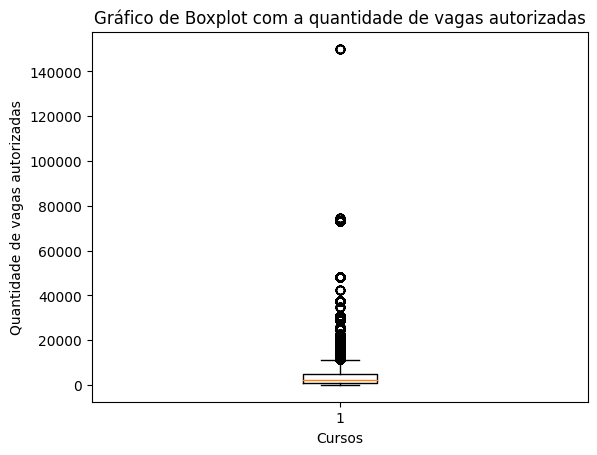

In [310]:
plt.boxplot(df['QT_VAGAS_AUTORIZADAS'])

plt.title('Gráfico de Boxplot com a quantidade de vagas autorizadas')
plt.ylabel('Quantidade de vagas autorizadas')
plt.xlabel('Cursos')

plt.show()

Não tem nenhum ruído, haja vista que é bem comum ter cursos EaD tecnólogos com muitas vagas.

In [311]:
df['NOME_CURSO'].value_counts().head()

NOME_CURSO
ADMINISTRAÇÃO                 22997
PEDAGOGIA                     22587
EDUCAÇÃO FÍSICA               18852
CIÊNCIAS CONTÁBEIS            17545
GESTÃO DE RECURSOS HUMANOS    16328
Name: count, dtype: int64

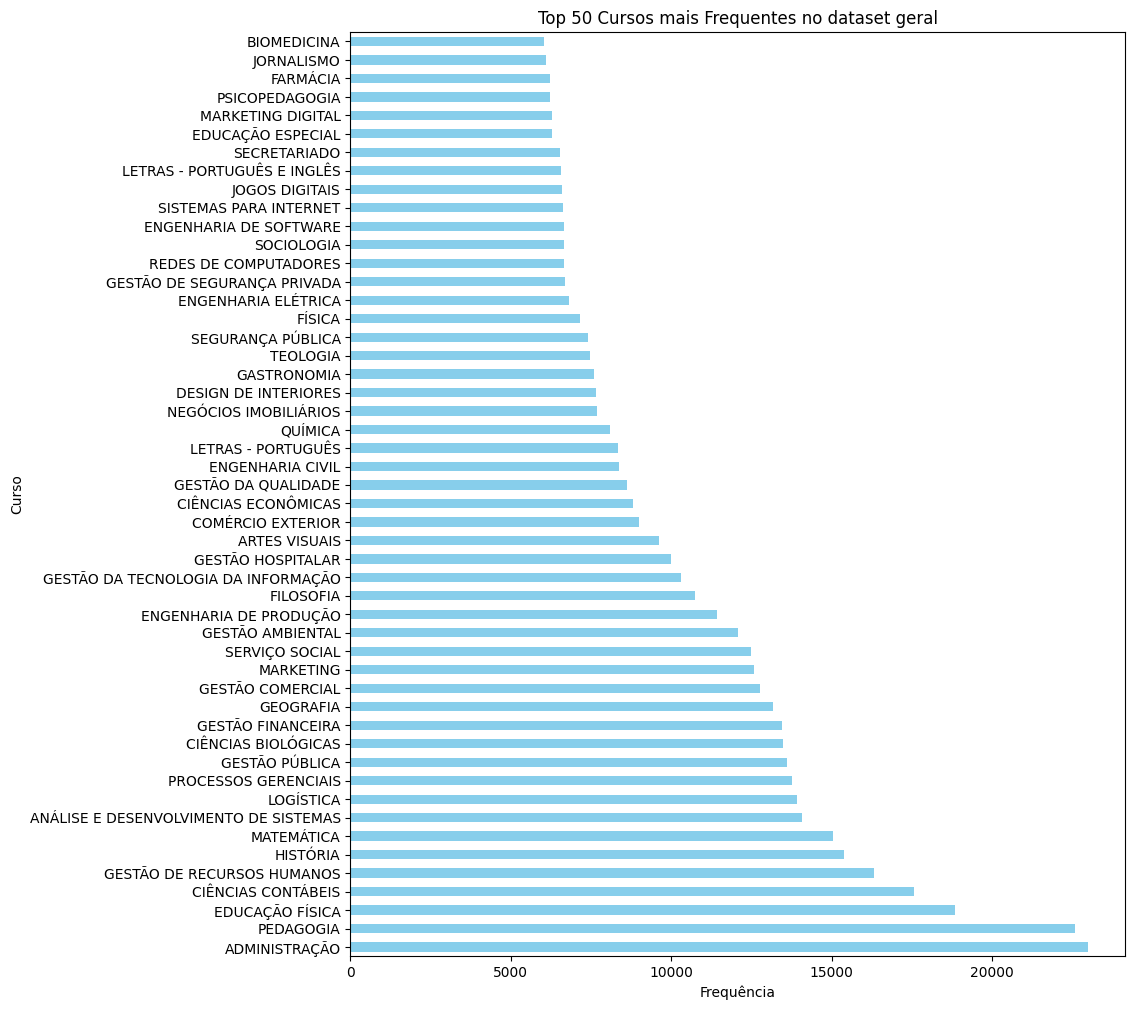

In [312]:
df['NOME_CURSO'].value_counts().sort_values(ascending=False).head(50).plot.barh(figsize=(10, 12), color='skyblue')
plt.title('Top 50 Cursos mais Frequentes no dataset geral')
plt.xlabel('Frequência')
plt.ylabel('Curso')
plt.show()

Necessário levar em conta que os dados anteriores também incluem cursos em atividade e extintos.

# **Pré-processamento - Transformação**

In [313]:
df.dtypes

NOME_IES                    object
CATEGORIA_ADMINISTRATIVA    object
ORGANIZACAO_ACADEMICA       object
NOME_CURSO                  object
GRAU                        object
MODALIDADE                  object
SITUACAO_CURSO              object
QT_VAGAS_AUTORIZADAS         int64
CARGA_HORARIA                int64
MUNICIPIO                   object
UF                          object
REGIAO                      object
dtype: object

# **Análises**

## **Refinamento**

In [314]:
dfa = df[df['SITUACAO_CURSO'] == 'Em atividade'] # dataframe apenas com cursos em atividades

In [315]:
dfa.shape

(852920, 12)

In [316]:
df.shape

(902676, 12)

Com esse refinamento tivemos uma redução de 49.756 cursos.

## **Distribuição dos cursos por região**

- Explorar a distribuição geográfica dos cursos de graduação no Brasil por estado.
- Identificar quais estados possuem mais cursos e quais têm menos.
- Analisar se existe alguma correlação entre a disponibilidade de cursos e indicadores socioeconômicos das regiões.

In [317]:
dfa['REGIAO'].value_counts()

REGIAO
SUDESTE              324727
NORDESTE             194187
SUL                  178700
NORTE                 79383
CENTRO-OESTE          75331
IGNORADO/EXTERIOR       592
Name: count, dtype: int64

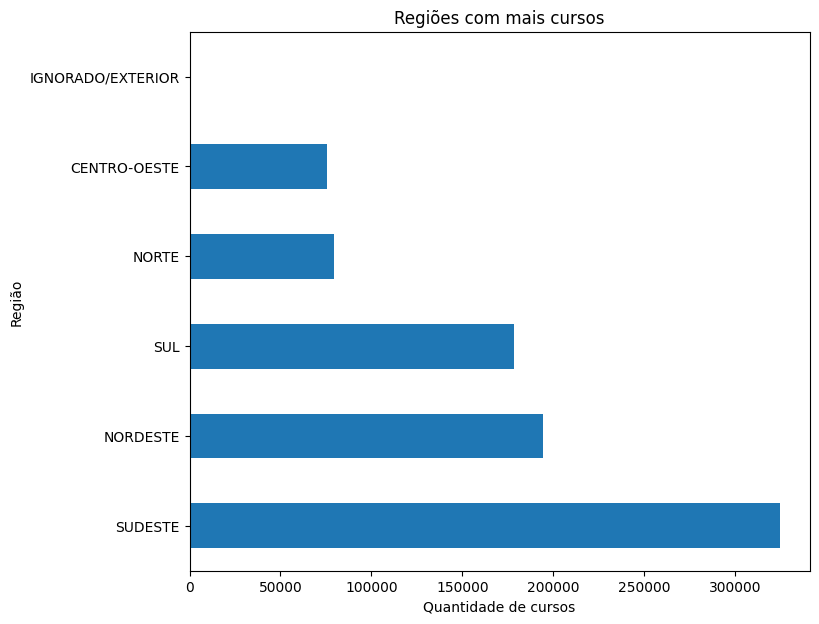

In [318]:
dfa['REGIAO'].value_counts().plot.barh(figsize=(8, 7))
plt.title('Regiões com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Região')
plt.show()

In [319]:
dfa['UF'].value_counts()

UF
SP    156047
MG    102741
PR     70751
RS     63417
BA     59081
RJ     44821
SC     44532
PA     38175
CE     34108
GO     31016
PE     26410
MA     25740
MT     23322
ES     21118
MS     17202
AM     11635
PB     11593
RO     10745
PI     10373
RN      9499
AL      9001
SE      8382
TO      7991
AC      5123
DF      3791
AP      2914
RR      2800
ZZ       592
Name: count, dtype: int64

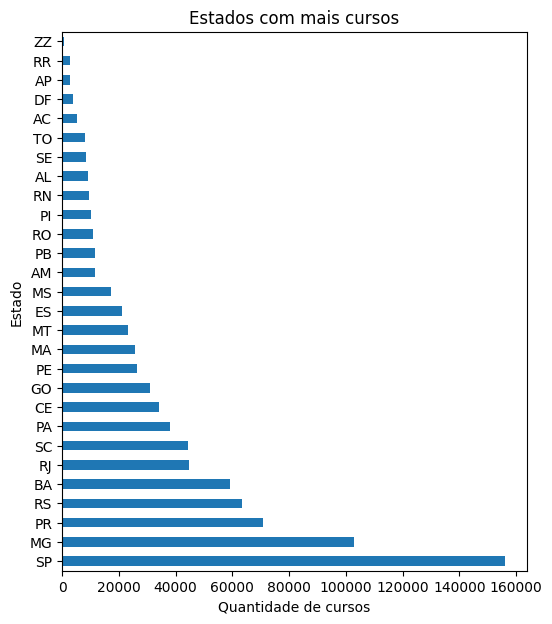

In [320]:
dfa['UF'].value_counts().plot.barh(figsize=(6, 7))
plt.title('Estados com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Estado')
plt.show()

In [321]:
cursos_rn = dfa[dfa['UF'] == 'RN']
cursos_rn['MUNICIPIO'].value_counts().head(15)

MUNICIPIO
Natal                      1863
Mossoró                    1280
Parnamirim                  817
Currais Novos               542
Caicó                       528
Ceará-Mirim                 485
Apodi                       456
Açu                         411
Pau dos Ferros              367
Macaíba                     314
João Câmara                 225
Santa Cruz                  184
Macau                       172
São Gonçalo do Amarante     165
Canguaretama                142
Name: count, dtype: int64

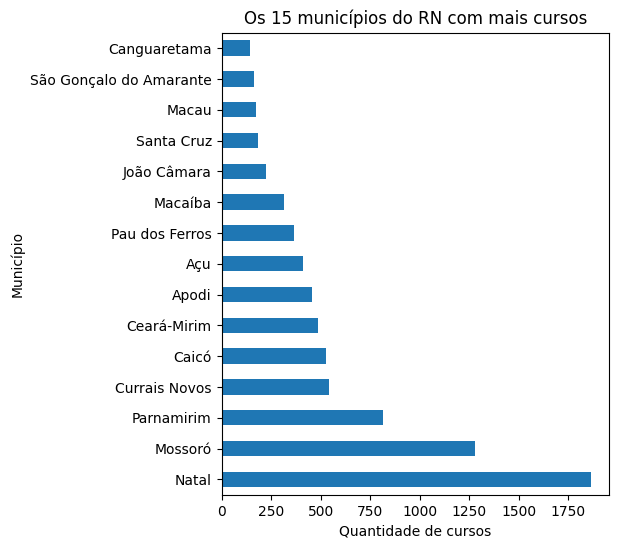

In [322]:
cursos_rn['MUNICIPIO'].value_counts().head(15).plot.barh(figsize=(5, 6))
plt.title('Os 15 municípios do RN com mais cursos')
plt.xlabel('Quantidade de cursos')
plt.ylabel('Município')
plt.show()

## **Perfil dos cursos por modalidade de ensino**

- Comparar a quantidade e a distribuição dos cursos de graduação presenciais e a distância (EaD).
- Analisar se existe diferenças nas áreas de estudo mais comuns entre as duas modalidades, bem como na carga horária e no grau dos cursos.

## **Situação dos cursos**

- Avaliar a proporção de cursos ativos e inativos e investigar os motivos para a inatividade desses cursos.
- Analisar se existe alguma relação entre a situação dos cursos e a categoria da instituição de ensino superior.


## **Clusterização de cursos por área de estudo**

- Agrupar os cursos de graduação em clusters com base em suas áreas de estudo. Explorar se existem padrões comuns entre os cursos dentro de cada cluster e se é possível identificar grupos de cursos com características semelhantes.